## Загрузка и предобработка данных

In [1]:
#Импортируем необходимые библиотеки для работы

#Базовые библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
import datetime as dt
import math as mth

#Графики
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px


In [2]:
#Зададим формат отображения вещественных чисел в Pandas
pd.set_option('display.float_format', '{:,.4f}'.format)

#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

#Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

#Не показываем предупреждения
warnings.filterwarnings(action='ignore')

In [3]:
#Загружаем данные 
import os.path


pth1 = 'C:/Users/ADMIN/OneDrive/Рабочий стол/тестовое/customers.csv'
pth2 = 'C:/Users/ADMIN/OneDrive/Рабочий стол/тестовое/loans.csv'

if os.path.exists(pth1) and os.path.exists(pth2):
    customers = pd.read_csv(pth1, sep=r',')
    loans = pd.read_csv(pth2, sep=r',')
else:
    print('Something is wrong')


In [4]:
#Зададим функцию, чтобы посмотреть информацию о данных в датасете
def data_overview(data):
    print('Первые 10 строк')
    display(data.head(10))
    print('Последние 10 строк')
    display(data.tail(10))
    print('Типы данных\n')
    display(data.info())
    print('Статистическая информация')
    display(data.describe())
    print('Пропуски\n')
    display(data.isna().sum())
          
    if data.duplicated().sum() > 0:
        print('\nДубликатов: ', data.duplicated().sum())
    else:
        print('\nДубликатов НЕТ')

**CUSTOMERS**

Информация о клиентах

In [5]:
#Смотрим информацию о датасете 
data_overview(customers)

Первые 10 строк


,customer_id,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date
0,6,male,1988-01-18,31.0000,"60,000.0000",found,found,0,2018-01-01 00:04:58
1,30,male,1997-02-05,35.0000,"60,000.0000",found,NaN,0,2018-01-01 00:24:20
2,69,male,1990-08-11,6.0000,"27,000.0000",found,found,0,2018-01-01 01:07:13
3,119,male,1999-10-27,31.0000,"5,000.0000",not_found,empty,0,2018-01-01 02:34:51
4,132,male,1987-03-15,83.0000,"45,000.0000",found,found,0,2018-01-01 02:58:08
5,162,male,1989-08-31,5.0000,"25,000.0000",found,found,1,2018-01-01 03:56:12
6,192,male,1969-11-05,20.0000,"45,000.0000",found,found,1,2018-01-01 05:31:56
7,242,female,1983-12-19,83.0000,"20,000.0000",found,found,0,2018-01-01 09:45:40
8,273,male,1996-08-03,36.0000,"20,000.0000",found,NaN,0,2018-01-01 11:18:49
9,292,male,1997-09-12,53.0000,"8,500.0000",found,found,0,2018-01-01 12:16:48


Последние 10 строк


,customer_id,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date
48347,1332868,male,2000-11-21,1.0000,"25,000.0000",found,error,0,2018-12-31 19:28:28
48348,1332912,male,1990-08-08,8.0000,"30,000.0000",found,found,0,2018-12-31 19:48:02
48349,1332939,male,1984-04-03,66.0000,"45,000.0000",found,found,0,2018-12-31 19:57:12
48350,1333010,female,1994-04-02,32.0000,"45,000.0000",found,NaN,0,2018-12-31 20:25:30
48351,1333050,male,1992-02-17,8.0000,"107,500.0000",found,found,1,2018-12-31 20:37:46
48352,1333068,female,1988-07-28,78.0000,"27,000.0000",found,NaN,0,2018-12-31 20:48:12
48353,1333100,male,1965-09-11,66.0000,"35,000.0000",found,found,0,2018-12-31 21:01:38
48354,1333252,female,2000-09-15,47.0000,"500,000.0000",not_found,empty,0,2018-12-31 22:44:31
48355,1333268,male,2000-04-19,23.0000,"720,000.0000",found,found,0,2018-12-31 22:59:06
48356,1333322,male,1959-04-16,16.0000,"160,000.0000",not_found,found,0,2018-12-31 23:54:47


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48357 entries, 0 to 48356
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      48357 non-null  int64  
 1   sex              48357 non-null  object 
 2   birthday         48357 non-null  object 
 3   region_id        48307 non-null  float64
 4   customer_income  48168 non-null  float64
 5   INN_status       48357 non-null  object 
 6   credit_history   40832 non-null  object 
 7   blocked          48357 non-null  int64  
 8   registred_date   48357 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 3.3+ MB


None

Статистическая информация


,customer_id,region_id,customer_income,blocked
count,"48,357.0000","48,307.0000","48,168.0000","48,357.0000"
mean,"670,009.6303",42.1494,"56,832.3569",0.1484
std,"387,132.1166",23.0371,"93,462.6955",0.3555
min,6.0000,1.0000,0.0000,0.0000
25%,"334,157.0000",24.0000,"24,000.0000",0.0000
50%,"668,721.0000",41.0000,"31,000.0000",0.0000
75%,"1,009,855.0000",63.0000,"48,000.0000",0.0000
max,"1,333,322.0000",87.0000,"999,999.0000",1.0000


Пропуски



customer_id           0
sex                   0
birthday              0
region_id            50
customer_income     189
INN_status            0
credit_history     7525
blocked               0
registred_date        0
dtype: int64


Дубликатов НЕТ


In [6]:
#Смотрим уникальные значения в столбце sex
customers['sex'].unique()

array(['male', 'female'], dtype=object)

**Столбец sex:**
- мужской пол
- женский пол

In [7]:
#Смотрим уникальные значения в столбце region_id
customers['region_id'].unique()

array([31., 35.,  6., 83.,  5., 20., 36., 53., 75., 77., 12., 30., 60.,
       27., 24., 46., 21., 14., 16., 65., 39., 67., 68., 38., 79., 76.,
       34., 72., 42., 25., 23., 66., 74.,  8., 26., 63., 51., 10., 64.,
       62., 47., 41., 78., 59.,  2., 17., 58., 56., 54., 57., 28., 61.,
       73., 70.,  9., 52., 40., 48.,  1., 82., 55., 43., 13., 84., 80.,
       44.,  7.,  4., 37.,  3., 45., 19., 32., 29., 50., 69., 71., 15.,
       49., 18., 22., 11., 33., nan, 85., 81., 86., 87.])

**Столбец region_id** - чило соответсвует номеру региона, нужно привести к типу int.

In [8]:
#Смотрим уникальные значения в столбце INN_status
customers['INN_status'].unique()

array(['found', 'not_found', 'not_checked', 'error'], dtype=object)

**Столбец INN_status**:
- found - найден
- not_found - не найден
- not_checked - не проверен
- error - ошибка

In [9]:
#Смотрим уникальные значения в столбце credit_history
customers['credit_history'].unique()

array(['found', nan, 'empty', 'not_found', 'error'], dtype=object)

**Столбец credit_history**:
- found - найдена
- empty - пустая, незаполненная
- not_found - не найдена
- error - ошибка

In [10]:
#Смотрим уникальные значения в столбце blocked
customers['blocked'].unique()

array([0, 1], dtype=int64)

**Столбец blocked**(скорее всего):
- 0 - нет
- 1 - да

**Изменяем типы данных в некоторых столбцах**

In [11]:
#Изменяем тип данных столбцов
customers['region_id'] = customers['region_id'].astype('Int64')
customers['birthday'] = pd.to_datetime(customers['birthday'])
customers['registred_date'] = pd.to_datetime(customers['registred_date'])

#Проверяем тип данных столбцов после замены
customers.dtypes

customer_id                 int64
sex                        object
birthday           datetime64[ns]
region_id                   Int64
customer_income           float64
INN_status                 object
credit_history             object
blocked                     int64
registred_date     datetime64[ns]
dtype: object

In [12]:
customers.head()

,customer_id,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date
0,6,male,1988-01-18,31,"60,000.0000",found,found,0,2018-01-01 00:04:58
1,30,male,1997-02-05,35,"60,000.0000",found,NaN,0,2018-01-01 00:24:20
2,69,male,1990-08-11,6,"27,000.0000",found,found,0,2018-01-01 01:07:13
3,119,male,1999-10-27,31,"5,000.0000",not_found,empty,0,2018-01-01 02:34:51
4,132,male,1987-03-15,83,"45,000.0000",found,found,0,2018-01-01 02:58:08


**LOANS**

Информация о кредитах

In [13]:
#Смотрим информацию 
data_overview(loans)

Первые 10 строк


,loan_id,customer_id,credit_date,status,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay
0,3493321,132,2018-01-01 03:20:44,closed,"3,000.0000",0.0228,21,2018-01-15 21:07:54,0,"5,007.6000",0
1,3493987,373,2018-01-01 14:35:23,sold,"5,000.0000",0.0228,21,2021-09-08 23:59:59,0,245.0000,1
2,3494106,192,2018-01-01 15:24:55,sold,"5,000.0000",0.0228,21,2019-09-24 00:00:00,0,"3,507.0000",1
3,3494119,431,2018-01-01 15:32:52,issued,"2,000.0000",0.0228,21,NaN,0,"1,974.8500",0
4,3494201,465,2018-01-01 15:54:53,closed,"6,000.0000",0.0228,21,2022-08-22 23:59:59,0,"20,169.0000",1
5,3494386,543,2018-01-01 17:10:05,issued,"5,000.0000",0.0228,21,NaN,0,371.6200,1
6,3494631,685,2018-01-01 18:28:10,issued,"6,000.0000",0.0228,21,NaN,0,NaN,1
7,3494750,737,2018-01-01 19:17:23,issued,"2,000.0000",0.0228,21,NaN,0,233.9100,1
8,3494882,648,2018-01-01 19:55:53,closed,"2,000.0000",0.0228,21,2018-01-22 00:45:03,0,"3,857.6000",0
9,3610683,648,2018-01-22 19:43:37,closed,"3,000.0000",0.0228,30,2019-03-30 03:56:38,0,"12,306.6000",1


Последние 10 строк


,loan_id,customer_id,credit_date,status,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay
46185,6124921,667897,2019-02-28 12:26:47,closed,"2,500.0000",0.0100,21,2019-03-14 00:44:41,0,"2,500.0000",0
46186,6124953,1254211,2019-02-28 12:34:12,closed,"2,000.0000",0.0100,21,2019-03-31 09:38:22,0,"2,920.0000",0
46187,6126817,1167675,2019-02-28 16:37:03,closed,"7,000.0000",0.0100,21,2019-03-19 15:01:30,0,"7,000.0000",0
46188,6127071,675536,2019-02-28 17:02:14,closed,"2,000.0000",0.0100,21,2019-03-03 14:56:58,0,"2,200.0000",0
46189,6127968,1276162,2019-02-28 18:41:35,closed,"2,000.0000",0.0100,16,2019-03-13 21:09:50,0,"2,000.0000",0
46190,6128036,845832,2019-02-28 18:48:27,closed,"2,000.0000",0.0100,21,2019-04-11 17:36:22,0,"3,640.0000",0
46191,6128179,983651,2019-02-28 19:03:43,closed,"3,500.0000",0.0100,21,2019-03-02 00:13:03,0,"3,700.0000",0
46192,6128653,905057,2019-02-28 20:02:48,closed,"2,000.0000",0.0100,21,2019-02-28 20:14:50,0,"2,000.0000",0
46193,6129299,1279185,2019-02-28 21:21:36,closed,"2,000.0000",0.0100,13,2019-03-13 16:15:08,0,"2,200.0000",0
46194,6129749,1323660,2019-02-28 22:24:28,issued,"6,000.0000",0.0100,21,NaN,0,"1,597.2800",1


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46195 entries, 0 to 46194
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_id              46195 non-null  int64  
 1   customer_id          46195 non-null  int64  
 2   credit_date          46195 non-null  object 
 3   status               46195 non-null  object 
 4   credit_amount        46195 non-null  float64
 5   credit_percent       46195 non-null  float64
 6   credit_time          46195 non-null  int64  
 7   fact_date            41511 non-null  object 
 8   fraud                46195 non-null  int64  
 9   all_payments         43608 non-null  float64
 10  first_payment_delay  46195 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 3.9+ MB


None

Статистическая информация


,loan_id,customer_id,credit_amount,credit_percent,credit_time,fraud,all_payments,first_payment_delay
count,"46,195.0000","46,195.0000","46,195.0000","46,195.0000","46,195.0000","46,195.0000","43,608.0000","46,195.0000"
mean,"4,944,814.4593","596,698.3441","6,259.0930",0.0118,20.6186,0.0217,"9,389.1245",0.2382
std,"694,406.6658","374,847.8585","4,310.4898",0.0028,8.1944,0.1456,"8,253.2245",0.4260
min,"3,493,321.0000",132.0000,"1,000.0000",0.0100,7.0000,0.0000,0.0100,0.0000
25%,"4,390,532.5000","267,020.5000","3,000.0000",0.0100,14.0000,0.0000,"3,490.0375",0.0000
50%,"4,987,424.0000","568,305.0000","5,000.0000",0.0100,21.0000,0.0000,"6,900.0000",0.0000
75%,"5,536,913.0000","904,745.5000","9,000.0000",0.0150,30.0000,0.0000,"12,897.3150",0.0000
max,"6,130,410.0000","1,333,050.0000","30,000.0000",0.0228,30.0000,1.0000,"98,001.5000",1.0000


Пропуски



loan_id                   0
customer_id               0
credit_date               0
status                    0
credit_amount             0
credit_percent            0
credit_time               0
fact_date              4684
fraud                     0
all_payments           2587
first_payment_delay       0
dtype: int64


Дубликатов НЕТ


In [14]:
#Смотрим уникальные значения в столбце status
loans['status'].unique()

array(['closed', 'sold', 'issued', 'bankrupt'], dtype=object)

**Столбец status (статус кредита):**
- closed - закрыт
- sold - продан
- issued - выдан
- bankrupt - банкрот

In [15]:
#Смотрим уникальные значения в столбце fraud
loans['fraud'].unique()

array([0, 1], dtype=int64)

**Столбец fraud (мошенничество):**
- 0 - нет
- 1 - да

In [16]:
#Смотрим уникальные значения в столбце first_payment_delay
loans['first_payment_delay'].unique() 

array([0, 1], dtype=int64)

**Столбец first_payment_delay (задержка первого платежа):**
- 0 - нет
- 1 - да

**Изменяем типы данных в некоторых столбцах**

In [17]:
#Изменяем тип данных столбцов
loans['credit_date'] = pd.to_datetime(loans['credit_date'])
loans['fact_date'] = pd.to_datetime(loans['fact_date'])

#Проверяем тип данных столбцов после замены
loans.dtypes

loan_id                         int64
customer_id                     int64
credit_date            datetime64[ns]
status                         object
credit_amount                 float64
credit_percent                float64
credit_time                     int64
fact_date              datetime64[ns]
fraud                           int64
all_payments                  float64
first_payment_delay             int64
dtype: object

**Объединение датасетов**

Сначала посмотрим сколько уникальных клиентов и в одном, и во втором датасете.

In [18]:
customers['customer_id'].nunique()

48357

In [19]:
loans['customer_id'].nunique()

16939

В customers более 48 тыс уникальных значений, это зарегистрированные люди. В loans (информации по кредитам) около 17 тыс. уникальных клиентов. Варианта 2: 1) не все зарегистрированные клиенты в итоге брали кредит, 2) представлена информация о части клиентов.

In [20]:
#Объединяем датасеты по customer_id,
data = loans.merge(customers, on='customer_id', how='left')

#Смотрим информацию 
data_overview(data)

Первые 10 строк


,loan_id,customer_id,credit_date,status,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date
0,3493321,132,2018-01-01 03:20:44,closed,"3,000.0000",0.0228,21,2018-01-15 21:07:54,0,"5,007.6000",0,male,1987-03-15,83,"45,000.0000",found,found,0,2018-01-01 02:58:08
1,3493987,373,2018-01-01 14:35:23,sold,"5,000.0000",0.0228,21,2021-09-08 23:59:59,0,245.0000,1,male,1982-08-10,77,"35,000.0000",found,found,1,2018-01-01 14:14:31
2,3494106,192,2018-01-01 15:24:55,sold,"5,000.0000",0.0228,21,2019-09-24 00:00:00,0,"3,507.0000",1,male,1969-11-05,20,"45,000.0000",found,found,1,2018-01-01 05:31:56
3,3494119,431,2018-01-01 15:32:52,issued,"2,000.0000",0.0228,21,NaT,0,"1,974.8500",0,male,1969-12-05,60,"25,500.0000",found,found,0,2018-01-01 15:18:53
4,3494201,465,2018-01-01 15:54:53,closed,"6,000.0000",0.0228,21,2022-08-22 23:59:59,0,"20,169.0000",1,male,1989-10-08,27,"42,000.0000",found,found,0,2018-01-01 15:41:19
5,3494386,543,2018-01-01 17:10:05,issued,"5,000.0000",0.0228,21,NaT,0,371.6200,1,female,1988-11-24,46,"25,000.0000",found,found,0,2018-01-01 16:51:06
6,3494631,685,2018-01-01 18:28:10,issued,"6,000.0000",0.0228,21,NaT,0,NaN,1,male,1982-01-24,31,"45,000.0000",found,found,0,2018-01-01 18:17:35
7,3494750,737,2018-01-01 19:17:23,issued,"2,000.0000",0.0228,21,NaT,0,233.9100,1,male,1996-11-09,20,"23,000.0000",found,empty,0,2018-01-01 18:55:17
8,3494882,648,2018-01-01 19:55:53,closed,"2,000.0000",0.0228,21,2018-01-22 00:45:03,0,"3,857.6000",0,male,1996-05-05,21,"25,000.0000",found,found,0,2018-01-01 17:55:20
9,3610683,648,2018-01-22 19:43:37,closed,"3,000.0000",0.0228,30,2019-03-30 03:56:38,0,"12,306.6000",1,male,1996-05-05,21,"25,000.0000",found,found,0,2018-01-01 17:55:20


Последние 10 строк


,loan_id,customer_id,credit_date,status,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date
46185,6124921,667897,2019-02-28 12:26:47,closed,"2,500.0000",0.0100,21,2019-03-14 00:44:41,0,"2,500.0000",0,female,1987-06-04,83,"20,000.0000",found,found,0,2018-06-08 12:25:38
46186,6124953,1254211,2019-02-28 12:34:12,closed,"2,000.0000",0.0100,21,2019-03-31 09:38:22,0,"2,920.0000",0,female,1995-07-13,76,"50,000.0000",found,empty,0,2018-12-07 10:22:37
46187,6126817,1167675,2019-02-28 16:37:03,closed,"7,000.0000",0.0100,21,2019-03-19 15:01:30,0,"7,000.0000",0,female,1987-07-24,1,"23,000.0000",not_found,found,0,2018-11-09 12:59:24
46188,6127071,675536,2019-02-28 17:02:14,closed,"2,000.0000",0.0100,21,2019-03-03 14:56:58,0,"2,200.0000",0,female,1989-09-15,20,"15,000.0000",found,found,0,2018-06-10 15:09:51
46189,6127968,1276162,2019-02-28 18:41:35,closed,"2,000.0000",0.0100,16,2019-03-13 21:09:50,0,"2,000.0000",0,male,1997-12-29,41,"17,500.0000",found,found,0,2018-12-14 16:04:33
46190,6128036,845832,2019-02-28 18:48:27,closed,"2,000.0000",0.0100,21,2019-04-11 17:36:22,0,"3,640.0000",0,female,1997-09-28,23,"15,000.0000",found,found,0,2018-07-30 17:25:05
46191,6128179,983651,2019-02-28 19:03:43,closed,"3,500.0000",0.0100,21,2019-03-02 00:13:03,0,"3,700.0000",0,male,1977-04-19,27,"45,000.0000",found,NaN,0,2018-09-08 23:50:48
46192,6128653,905057,2019-02-28 20:02:48,closed,"2,000.0000",0.0100,21,2019-02-28 20:14:50,0,"2,000.0000",0,female,2000-07-13,68,"10,000.0000",found,NaN,0,2018-08-16 18:20:58
46193,6129299,1279185,2019-02-28 21:21:36,closed,"2,000.0000",0.0100,13,2019-03-13 16:15:08,0,"2,200.0000",0,female,1985-05-19,6,"35,000.0000",found,found,0,2018-12-15 18:13:21
46194,6129749,1323660,2019-02-28 22:24:28,issued,"6,000.0000",0.0100,21,NaT,0,"1,597.2800",1,male,1999-08-17,60,"360,000.0000",found,NaN,0,2018-12-29 00:38:19


Типы данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46195 entries, 0 to 46194
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_id              46195 non-null  int64         
 1   customer_id          46195 non-null  int64         
 2   credit_date          46195 non-null  datetime64[ns]
 3   status               46195 non-null  object        
 4   credit_amount        46195 non-null  float64       
 5   credit_percent       46195 non-null  float64       
 6   credit_time          46195 non-null  int64         
 7   fact_date            41511 non-null  datetime64[ns]
 8   fraud                46195 non-null  int64         
 9   all_payments         43608 non-null  float64       
 10  first_payment_delay  46195 non-null  int64         
 11  sex                  46195 non-null  object        
 12  birthday             46195 non-null  datetime64[ns]
 13  region_id         

None

Статистическая информация


,loan_id,customer_id,credit_date,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay,birthday,region_id,customer_income,blocked,registred_date
count,"46,195.0000","46,195.0000",46195,"46,195.0000","46,195.0000","46,195.0000",41511,"46,195.0000","43,608.0000","46,195.0000",46195,"46,195.0000","46,194.0000","46,195.0000",46195
mean,"4,944,814.4593","596,698.3441",2018-08-25 01:06:02.095356416,"6,259.0930",0.0118,20.6186,2019-02-12 22:37:26.384548608,0.0217,"9,389.1245",0.2382,1988-02-23 15:33:36.451996992,42.7441,"54,980.1044",0.2574,2018-05-31 21:21:37.449637376
min,"3,493,321.0000",132.0000,2018-01-01 03:20:44,"1,000.0000",0.0100,7.0000,2018-01-03 06:17:17,0.0000,0.0100,0.0000,1942-10-14 00:00:00,1.0000,0.0000,0.0000,2018-01-01 02:58:08
25%,"4,390,532.5000","267,020.5000",2018-05-22 23:11:32.500000,"3,000.0000",0.0100,14.0000,2018-07-16 00:32:56,0.0000,"3,490.0375",0.0000,1983-07-18 00:00:00,25.0000,"25,000.0000",0.0000,2018-03-09 02:27:39.500000
50%,"4,987,424.0000","568,305.0000",2018-08-30 20:38:23,"5,000.0000",0.0100,21.0000,2018-11-14 16:30:50,0.0000,"6,900.0000",0.0000,1989-10-18 00:00:00,41.0000,"35,000.0000",0.0000,2018-05-14 12:41:03
75%,"5,536,913.0000","904,745.5000",2018-12-01 19:38:51.500000,"9,000.0000",0.0150,30.0000,2019-02-18 04:00:08.500000,0.0000,"12,897.3150",0.0000,1995-04-09 00:00:00,63.0000,"50,000.0000",1.0000,2018-08-16 16:55:58
max,"6,130,410.0000","1,333,050.0000",2019-02-28 23:55:10,"30,000.0000",0.0228,30.0000,2023-01-26 12:02:29,1.0000,"98,001.5000",1.0000,2001-01-13 00:00:00,85.0000,"980,000.0000",1.0000,2018-12-31 20:37:46
std,"694,406.6658","374,847.8585",NaN,"4,310.4898",0.0028,8.1944,NaN,0.1456,"8,253.2245",0.4260,NaN,22.6831,"83,768.3655",0.4372,NaN


Пропуски



loan_id                   0
customer_id               0
credit_date               0
status                    0
credit_amount             0
credit_percent            0
credit_time               0
fact_date              4684
fraud                     0
all_payments           2587
first_payment_delay       0
sex                       0
birthday                  0
region_id                 0
customer_income           1
INN_status                0
credit_history         1932
blocked                   0
registred_date            0
dtype: int64


Дубликатов НЕТ


Пропуски в fact_date и all_payments могут быть по причине, что статус у кредита - issued. Посмотрим сколько от общего количества пропусков в credit_history.

In [21]:
#Вычисляем пропуски
credit_history = data['credit_history'].isna().sum() / len(data)
print("Пропусков в столбце credit_history от общего количества:", round(credit_history, 5))


Пропусков в столбце credit_history от общего количества: 0.04182


4% пропусков в credit_history, возникает вопрос в связи с чем есть пропуски, а не использовано "not_found". Оставим, удалять не будем.

In [22]:
#Количество значений в исходном датасете
количество_значений_до = data.shape[0]

#Удаляем строки с пропущенными значениями в столбце customer_income
data = data.dropna(subset=['customer_income']).reset_index(drop=True)

#Количество значений после удаления 
количество_значений_после = data.shape[0]

print(f"Количество значений до удаления пропусков: {количество_значений_до}")
print(f"Количество значений после удаления пропусков: {количество_значений_после}\n")
print('Пропуски\n')
display(data.isna().sum())

Количество значений до удаления пропусков: 46195
Количество значений после удаления пропусков: 46194

Пропуски



loan_id                   0
customer_id               0
credit_date               0
status                    0
credit_amount             0
credit_percent            0
credit_time               0
fact_date              4684
fraud                     0
all_payments           2587
first_payment_delay       0
sex                       0
birthday                  0
region_id                 0
customer_income           0
INN_status                0
credit_history         1932
blocked                   0
registred_date            0
dtype: int64

In [23]:
#Вычисление возраста на момент кредита
credit_date = pd.to_datetime(data['credit_date'], format='%Y-%m-%d')
data['age_as_of_creditdate'] = credit_date.sub(data['birthday']).dt.days // 365
data.head()

,loan_id,customer_id,credit_date,status,credit_amount,credit_percent,credit_time,fact_date,fraud,all_payments,first_payment_delay,sex,birthday,region_id,customer_income,INN_status,credit_history,blocked,registred_date,age_as_of_creditdate
0,3493321,132,2018-01-01 03:20:44,closed,"3,000.0000",0.0228,21,2018-01-15 21:07:54,0,"5,007.6000",0,male,1987-03-15,83,"45,000.0000",found,found,0,2018-01-01 02:58:08,30
1,3493987,373,2018-01-01 14:35:23,sold,"5,000.0000",0.0228,21,2021-09-08 23:59:59,0,245.0000,1,male,1982-08-10,77,"35,000.0000",found,found,1,2018-01-01 14:14:31,35
2,3494106,192,2018-01-01 15:24:55,sold,"5,000.0000",0.0228,21,2019-09-24 00:00:00,0,"3,507.0000",1,male,1969-11-05,20,"45,000.0000",found,found,1,2018-01-01 05:31:56,48
3,3494119,431,2018-01-01 15:32:52,issued,"2,000.0000",0.0228,21,NaT,0,"1,974.8500",0,male,1969-12-05,60,"25,500.0000",found,found,0,2018-01-01 15:18:53,48
4,3494201,465,2018-01-01 15:54:53,closed,"6,000.0000",0.0228,21,2022-08-22 23:59:59,0,"20,169.0000",1,male,1989-10-08,27,"42,000.0000",found,found,0,2018-01-01 15:41:19,28


In [24]:
data['credit_date'].describe()

count                            46194
mean     2018-08-25 01:13:16.870459392
min                2018-01-01 03:20:44
25%                2018-05-22 23:25:29
50%         2018-08-30 20:38:23.500000
75%      2018-12-01 19:39:41.249999872
max                2019-02-28 23:55:10
Name: credit_date, dtype: object

Данные представлены за период с 2018-01-01  по 2019-02-28.

**Вывод**

Загрузили данные и подготовили данные к дальнейшей исследовательской работе, а именно:
	
- Привели столбцы дат к подходящему типу данных.
- Объединили 2 датасета.
- Удалили пропуск, связанный с доходом.
- Получился датасет с *46194* строками данных.


## Исследовательский анализ данных

In [25]:
#Смотрим статистическую информацию по некоторым столбцам
data[['credit_amount', 'credit_percent', 'credit_time', 'fraud', 'all_payments', 'first_payment_delay', 'customer_income', 'blocked', 'age_as_of_creditdate']].describe()

,credit_amount,credit_percent,credit_time,fraud,all_payments,first_payment_delay,customer_income,blocked,age_as_of_creditdate
count,"46,194.0000","46,194.0000","46,194.0000","46,194.0000","43,607.0000","46,194.0000","46,194.0000","46,194.0000","46,194.0000"
mean,"6,259.1527",0.0118,20.6186,0.0217,"9,389.0853",0.2382,"54,980.1044",0.2574,30.0159
std,"4,310.5174",0.0028,8.1945,0.1456,"8,253.3151",0.4260,"83,768.3655",0.4372,9.2449
min,"1,000.0000",0.0100,7.0000,0.0000,0.0100,0.0000,0.0000,0.0000,18.0000
25%,"3,000.0000",0.0100,14.0000,0.0000,"3,490.0250",0.0000,"25,000.0000",0.0000,23.0000
50%,"5,000.0000",0.0100,21.0000,0.0000,"6,900.0000",0.0000,"35,000.0000",0.0000,28.0000
75%,"9,000.0000",0.0150,30.0000,0.0000,"12,897.8100",0.0000,"50,000.0000",1.0000,35.0000
max,"30,000.0000",0.0228,30.0000,1.0000,"98,001.5000",1.0000,"980,000.0000",1.0000,75.0000


В столбце customer_income максимальное значение равно 980 000 р., есть необходимость проверить.

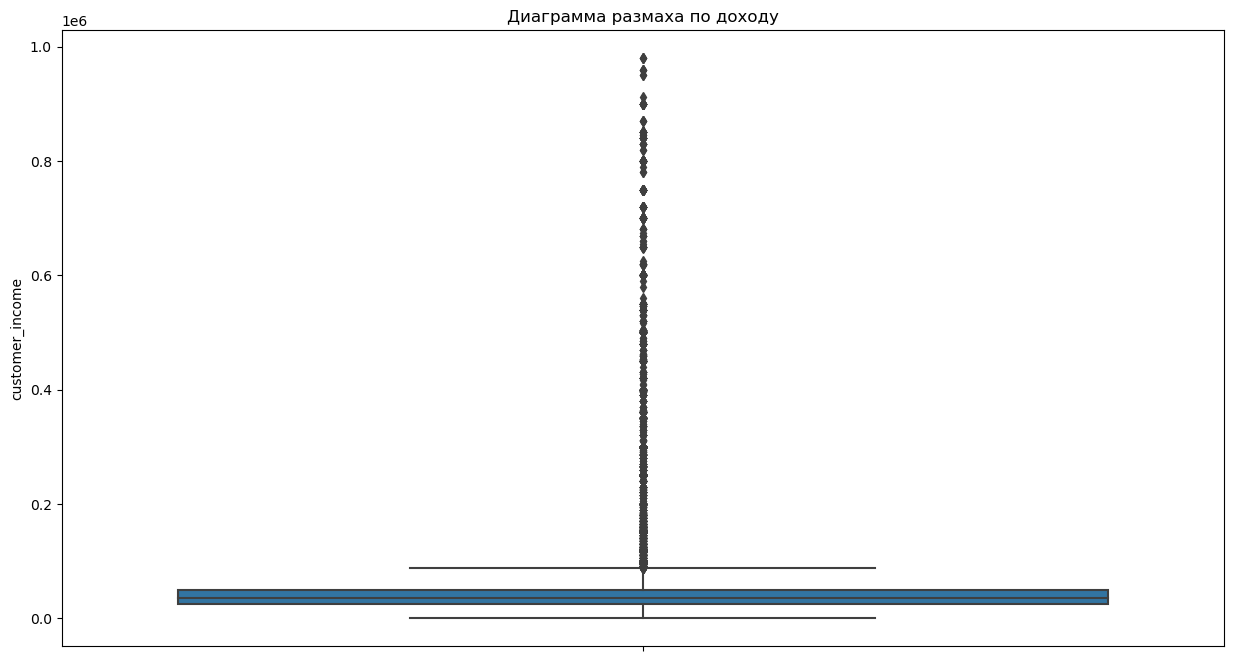

In [26]:
#Строим диаграмму размаха
plt.figure(figsize=(15, 8))
ax = sb.boxplot(y='customer_income', data=data)

plt.title('Диаграмма размаха по доходу')
plt.show();


In [27]:
#Подсчет количества значений больше 900 000 рублей
count = len(data[data['customer_income'] > 900000])
count

9

Видимо максимальное значение дохода в 980,000 р. не случайность или ошибка.

**1) Определим лучший и стоящий сегмент**

Будем понимать под лучшим и стоящим сегментом: относительно статуса кредита, то есть тот клиент, который закрывает кредит.

In [28]:
#Составляем таблицу характеристик
characteristic = data[['sex', 'region_id', 'customer_income', 'credit_history', 'all_payments', 'age_as_of_creditdate', 'status', 'credit_amount', 'credit_time', 'first_payment_delay']]
characteristic.head()

,sex,region_id,customer_income,credit_history,all_payments,age_as_of_creditdate,status,credit_amount,credit_time,first_payment_delay
0,male,83,"45,000.0000",found,"5,007.6000",30,closed,"3,000.0000",21,0
1,male,77,"35,000.0000",found,245.0000,35,sold,"5,000.0000",21,1
2,male,20,"45,000.0000",found,"3,507.0000",48,sold,"5,000.0000",21,1
3,male,60,"25,500.0000",found,"1,974.8500",48,issued,"2,000.0000",21,0
4,male,27,"42,000.0000",found,"20,169.0000",28,closed,"6,000.0000",21,1


In [29]:
#Замена значений для подсчета 
characteristic.loc[characteristic['sex']=='male', 'sex'] = 1
characteristic.loc[characteristic['sex']=='female','sex'] = 0

characteristic.loc[characteristic['credit_history']=='found', 'credit_history'] = 0
characteristic.loc[characteristic['credit_history']=='empty','credit_history'] = 1
characteristic.loc[characteristic['credit_history']=='not_found','credit_history'] = 2
characteristic.loc[characteristic['credit_history']=='error','credit_history'] = 3

characteristic.loc[characteristic['status']=='closed', 'status'] = 0
characteristic.loc[characteristic['status']=='sold','status'] = 1
characteristic.loc[characteristic['status']=='issued','status'] = 2
characteristic.loc[characteristic['status']=='bankrupt','status'] = 3

characteristic.head()

,sex,region_id,customer_income,credit_history,all_payments,age_as_of_creditdate,status,credit_amount,credit_time,first_payment_delay
0,1,83,"45,000.0000",0,"5,007.6000",30,0,"3,000.0000",21,0
1,1,77,"35,000.0000",0,245.0000,35,1,"5,000.0000",21,1
2,1,20,"45,000.0000",0,"3,507.0000",48,1,"5,000.0000",21,1
3,1,60,"25,500.0000",0,"1,974.8500",48,2,"2,000.0000",21,0
4,1,27,"42,000.0000",0,"20,169.0000",28,0,"6,000.0000",21,1


In [30]:
#Рассмотрим характеристики в разрезе статуса кредита
data_new = characteristic.groupby(['status']).agg({
                         'status': 'count',
                         'sex': 'mean', 
                         'customer_income': 'median', 
                         'credit_history': 'mean',
                         'age_as_of_creditdate': 'median',
                         'all_payments': 'median',
                         'credit_amount': 'median',
                         'credit_time': 'median',
                         'first_payment_delay': 'mean'}).rename(columns = {'status':'count'})
display(data_new)

,count,sex,customer_income,credit_history,age_as_of_creditdate,all_payments,credit_amount,credit_time,first_payment_delay
status,,,,,,,,,
0,38412,0.6537,"35,000.0000",0.0854,28.0000,"7,280.0000","5,000.0000",21.0000,0.1348
1,2772,0.6479,"35,000.0000",0.0506,31.0000,"1,551.0000","5,000.0000",21.0000,0.7619
2,4684,0.5890,"35,000.0000",0.0632,31.0000,"3,348.0000","6,000.0000",21.0000,0.7564
3,326,0.4816,"40,500.0000",0.0099,35.0000,"3,630.0000","11,000.0000",30.0000,0.5215


In [31]:
#Создадим функцию и построим графики
def graph(data, hue=None):
    
    for column in ['sex', 'credit_history', 'first_payment_delay']:
        ax = sb.countplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 12, color = 'black')
        plt.show()
    
    plt.figure(figsize=(16,7))
    sb.countplot(data=data, x='age_as_of_creditdate', hue=hue);
    plt.title('Распределение клиентов по возрасту', fontsize = 12, color = 'black')
    plt.show()

    
    for column in ['customer_income',  'credit_amount', 'credit_time']:
        sb.kdeplot(data=data, x=column, hue=hue);
        plt.title(f'Распределение клиентов по признаку {column}', fontsize = 12, color = 'black')
        plt.show()

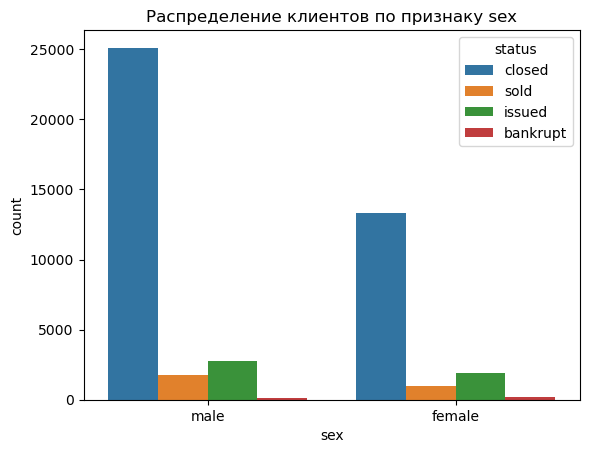

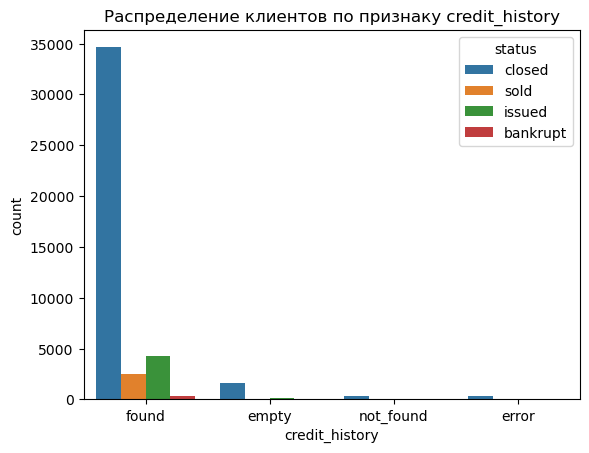

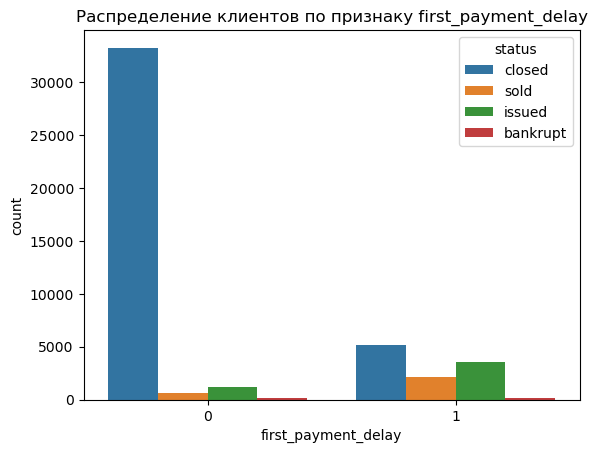

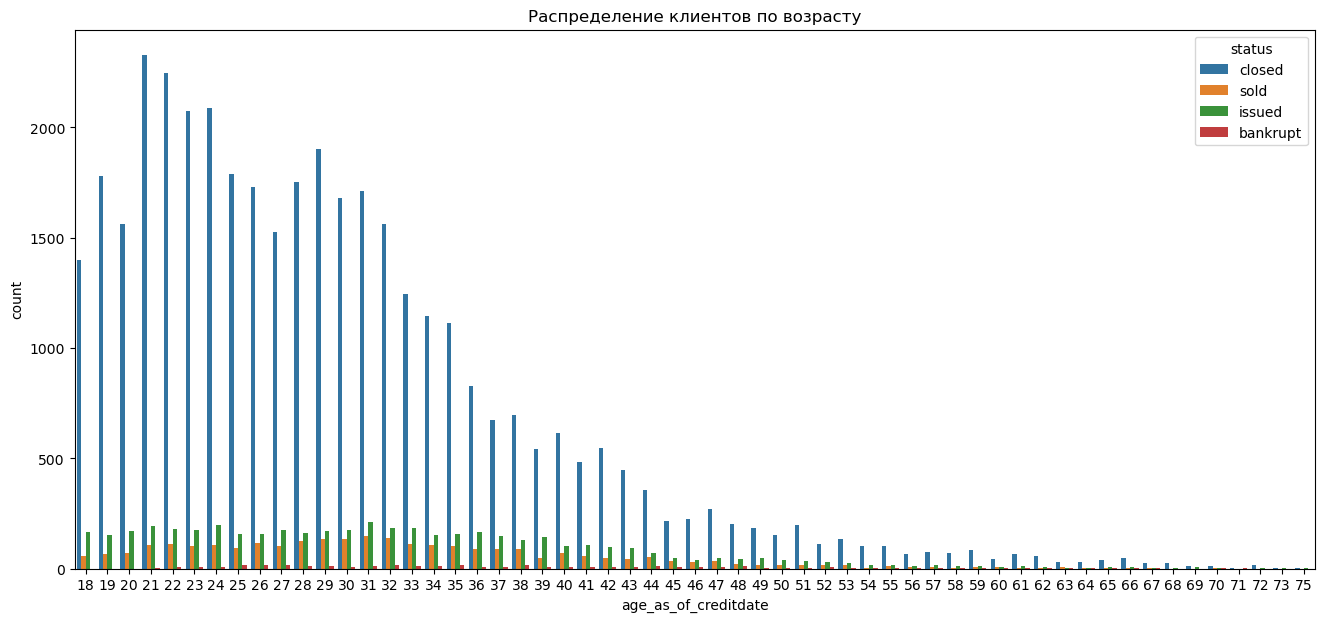

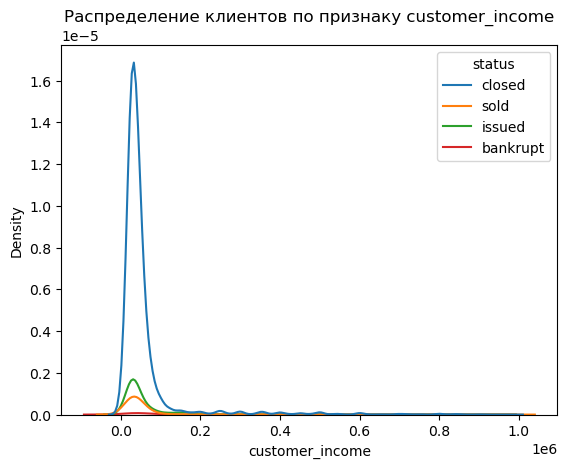

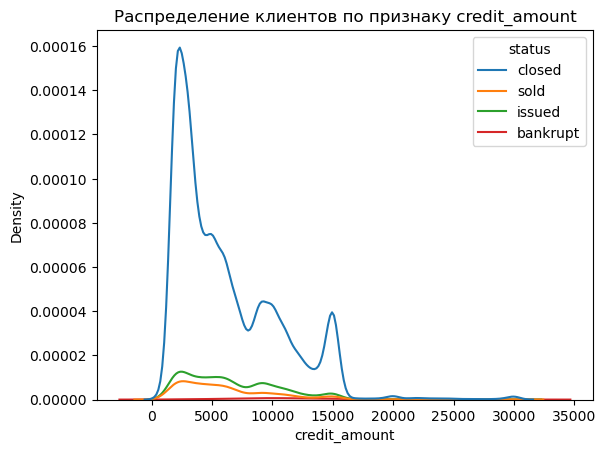

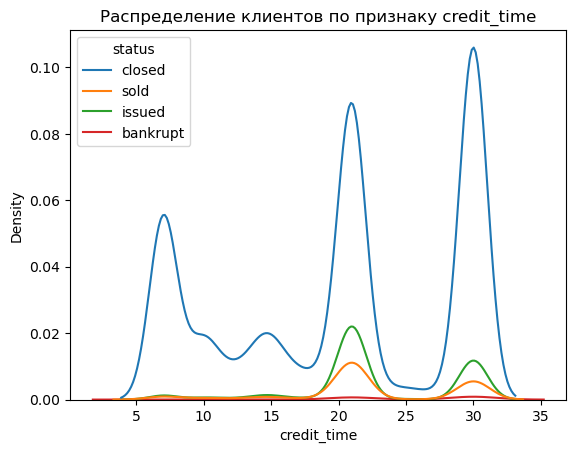

In [32]:
#формируем визуализацию
graph(data, hue='status') 

**ВЫВОД**

**Характеристика стоящего сегмента:**
то есть опишем клиентов, которые закрывают кредит (значения характеристик наибольшие)

- мужской пол
- возраста в промежутке 21-29 лет
- с доходом 35 000 р.
- с наличием кредитной истории
- без задержек первого платежа
- с суммой займа 3-5 тыс.
- на 30 дней

**2) Определим самые прибыльные сегменты**

Будем определять различные категории по признаку "всех платежей". Так как непрерывные значения в данном столбце, то будем использовать медиану. Сумму использовать нецелеообразно, так как категории могут различаться количественно, что исказит результат.


In [33]:
sex = data.groupby('sex').agg({'sex': 'count', 'all_payments': 'median'})
sex

,sex,all_payments
sex,,
female,16372,"7,660.0000"
male,29822,"6,394.0000"


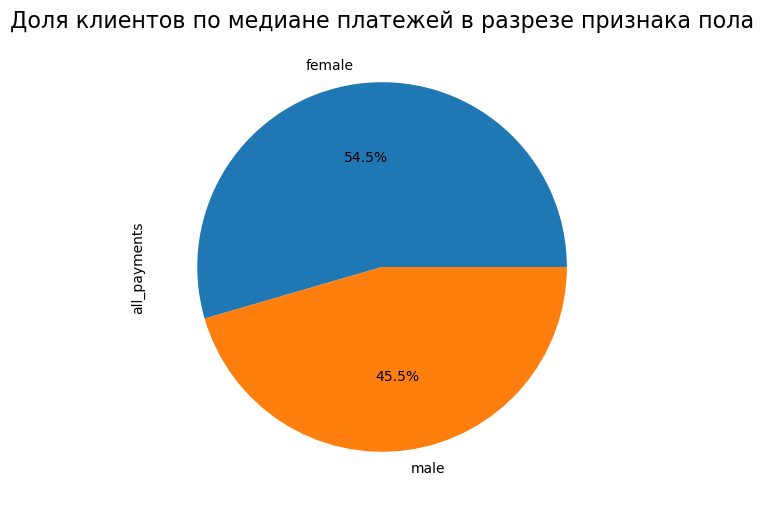

In [34]:
#строим круговую диаграмму
sex.plot(kind = 'pie', y ='all_payments', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов по медиане платежей в разрезе признака пола', fontsize = 16)
plt.legend().remove()
plt.show()

In [35]:
#Создадим функцию
def categorize_age(age):
    try:
        if 18 <= age <= 25:
            return 'D'
        elif 26 <= age <= 35:
            return 'C'
        elif 36 <= age <= 50:
            return 'B'
        elif 51 <= age <= 75:
            return 'A'
    except:
        pass

In [36]:
data['age_category'] = data['age_as_of_creditdate'].apply(categorize_age)
age = data.groupby('age_category').agg({'age_category':'count', 'all_payments': 'median'})
age

,age_category,all_payments
age_category,,
A,1756,"10,484.0000"
B,8589,"8,785.7500"
C,18430,"7,367.4550"
D,17419,"5,600.0000"


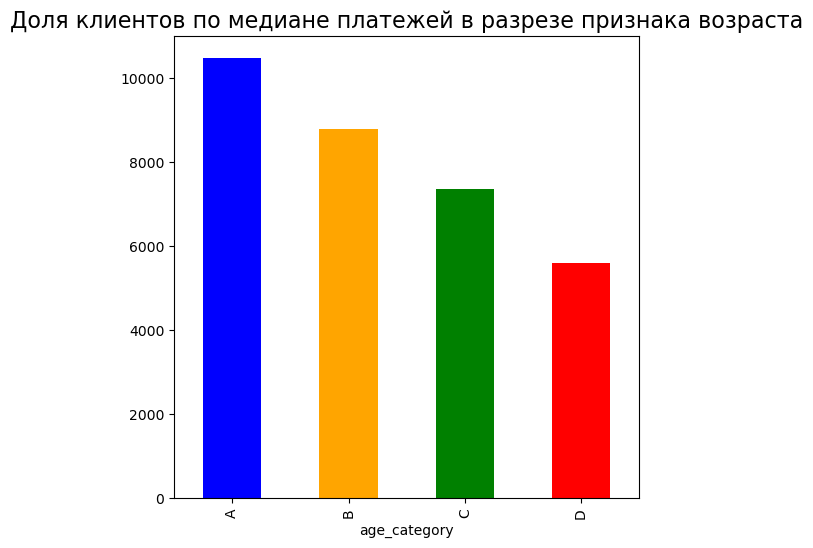

In [37]:
#Строим график
age.plot(kind = 'bar', y ='all_payments',  figsize= (6,6), color=['blue', 'orange', 'green', 'red']
                       );
plt.title('Доля клиентов по медиане платежей в разрезе признака возраста', fontsize = 16)
plt.legend().remove()
plt.show()

In [38]:
#Создадим функцию
def categorize_income(income):
    try:
        if 0 <= income <= 10000:
            return 'E'
        elif 10001 <= income <= 25000:
            return 'D'
        elif 25001 <= income <= 50000:
            return 'C'
        elif 50001 <= income <= 100000:
            return 'B'
        elif income >= 100001:
            return 'A'
    except:
        pass

In [39]:
data['total_income_category'] = data['customer_income'].apply(categorize_income)
income = data.groupby('total_income_category').agg({'total_income_category': 'count', 'all_payments': 'median'})
income

,total_income_category,all_payments
total_income_category,,
A,3007,"7,881.9950"
B,7264,"10,100.0000"
C,23475,"7,079.0000"
D,11039,"5,550.0000"
E,1409,"4,161.7250"


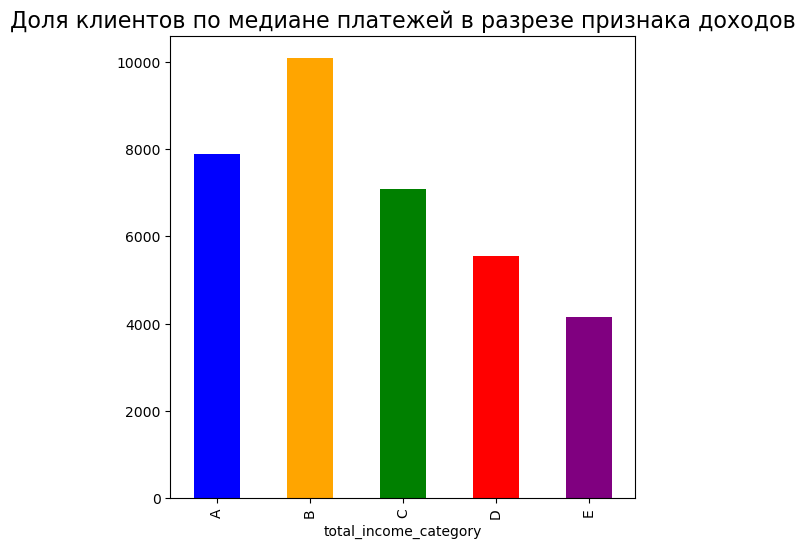

In [40]:
#Строим график
income.plot(kind = 'bar', y ='all_payments',  figsize= (6,6), color=['blue', 'orange', 'green', 'red', 'purple']
                       );
plt.title('Доля клиентов по медиане платежей в разрезе признака доходов', fontsize = 16)
plt.legend().remove()
plt.show()

In [41]:
data['credit_time'].unique()

array([21, 30,  7, 10, 15, 17, 25, 13, 16, 14, 26, 19,  8, 12, 24, 18, 28,
       27, 22, 20, 23, 11,  9, 29], dtype=int64)

In [42]:
#Создадим функцию
def categorize_days(days):
    try:
        if 7 <= days <= 15:
            return 'C'
        elif 16 <= days <= 21:
            return 'B'
        elif 22 <= days <= 30:
            return 'A'
    except:
        pass

In [43]:
data['creditday_category'] = data['credit_time'].apply(categorize_days)
days = data.groupby('creditday_category').agg({'creditday_category': 'count', 'all_payments': 'median'})
days

,creditday_category,all_payments
creditday_category,,
A,16228,"10,100.0000"
B,16931,"6,887.1900"
C,13035,"4,360.0000"


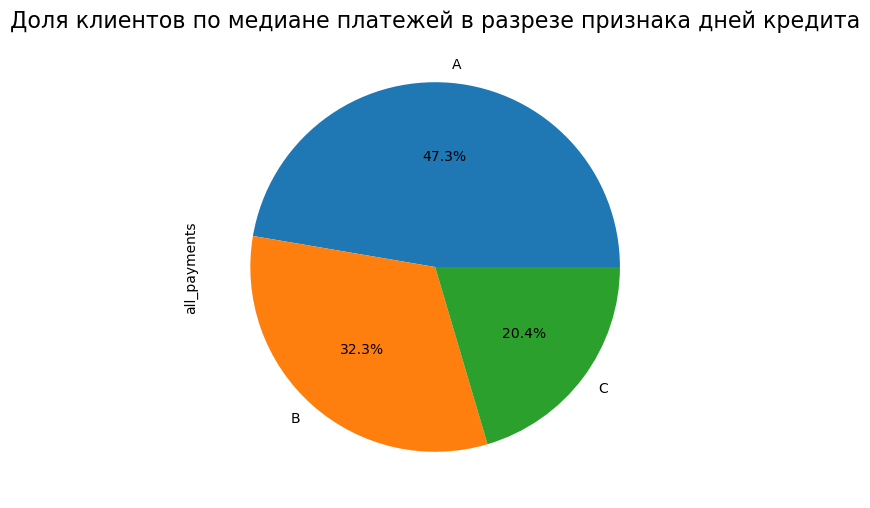

In [44]:
#строим круговую диаграмму
days.plot(kind = 'pie', y ='all_payments', autopct='%1.1f%%', figsize= (6,6),
                       );
plt.title('Доля клиентов по медиане платежей в разрезе признака дней кредита', fontsize = 16)
plt.legend().remove()
plt.show()

**ВЫВОД**


**Прибыльный клиент, характеристика:** считали по медиане платежей
- по половозрастному критерию - женского пола, возрастной группы 51-75 лет;
- по доходу - более 50000 и до 100000 р.;
- по количеству дней кредита - 22-30 дней.

Однако, если рассматривать **сегмент клиентов по общей прибыли** (в связи с тем, что в выделенных категориях больше по количеству) тогда:
- клиент мужского пола, 26-35 лет;
- с доходом 25-50 тыс.р.
- дни кредита также 16-21 (небольшая разница с категорией 22-30).

**3) Проведем анализ портфеля на предмет уровня риска в разных клиентских сегментах**

Будем анализировать статус кредита, а именно позиции, связанные с банкроством и продажей кредита.

In [45]:
#Смотрим риски по половому признаку
risk = data.query('status != "closed" & status != "issued"')
sex_risk = risk.groupby(['status','sex']).agg({'sex': 'count'}).rename(columns = {'sex':'count'})
sex_risk

count
status   sex          
bankrupt female    169
         male      157
sold     female    976
         male     1796

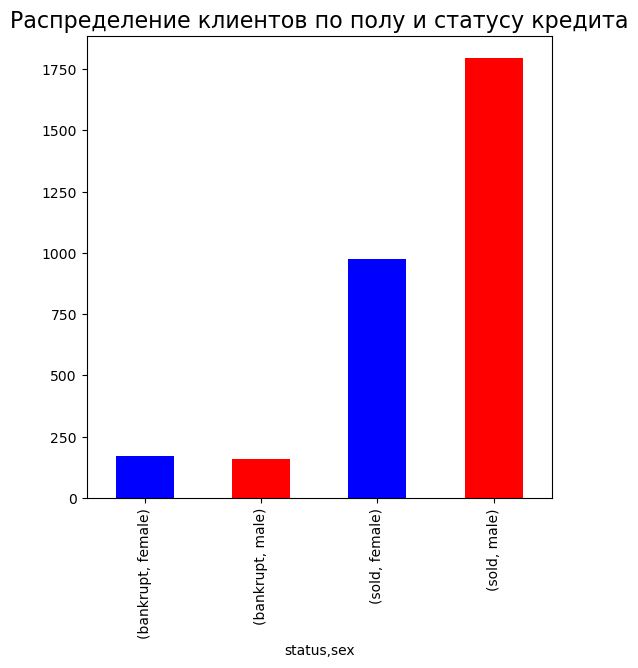

In [46]:
#Строим график
sex_risk.plot(kind = 'bar', y ='count',  figsize= (6,6), color=['blue', 'red']
                       );
plt.title('Распределение клиентов по полу и статусу кредита', fontsize = 16)
plt.legend().remove()
plt.show()

In [47]:
#Смотрим риски по возрастному признаку
age_risk = risk.groupby(['status','age_category']).agg({'age_category': 'count'}).rename(columns = {'age_category':'count'})
age_risk

count
status   age_category       
bankrupt A                50
         B               110
         C               131
         D                35
sold     A               110
         B               730
         C              1211
         D               721

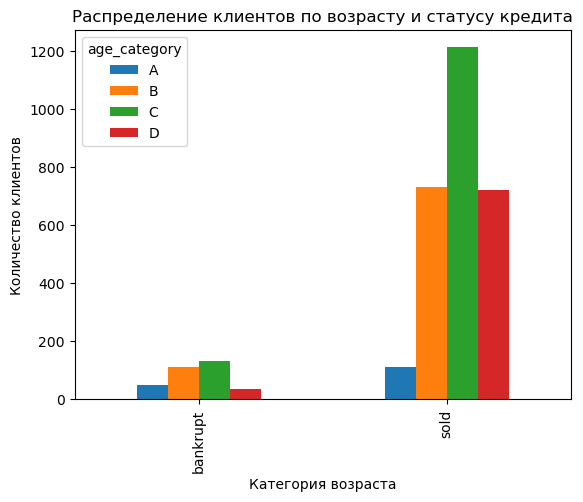

In [48]:
#Создание графика
fig, ax = plt.subplots()
#Построение столбчатой диаграммы
age_risk['count'].unstack().plot(kind='bar', ax=ax)

#Настройка осей и заголовка
ax.set_xlabel('Категория возраста')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов по возрасту и статусу кредита')

# Отображение графика
plt.show();

In [49]:
#Смотрим риски по признаку дохода
income_risk = risk.groupby(['status','total_income_category']).agg({'total_income_category': 'count'}).rename(columns = {'total_income_category':'count'})
income_risk

count
status   total_income_category       
bankrupt A                         29
         B                         76
         C                        168
         D                         51
         E                          2
sold     A                        212
         B                        370
         C                       1432
         D                        685
         E                         73

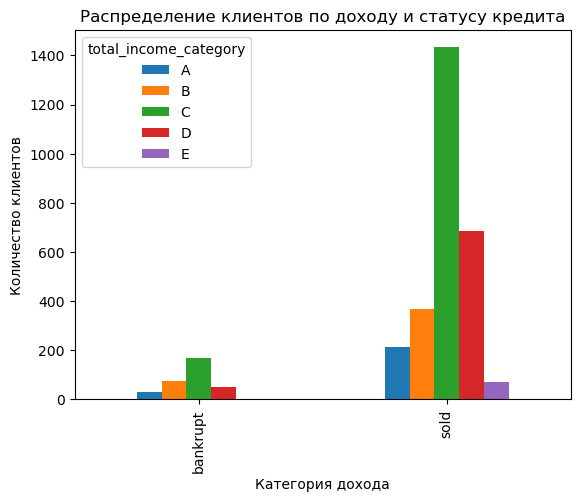

In [50]:
#Создание графика
fig, ax = plt.subplots()
#Построение столбчатой диаграммы
income_risk['count'].unstack().plot(kind='bar', ax=ax)

#Настройка осей и заголовка
ax.set_xlabel('Категория дохода')
ax.set_ylabel('Количество клиентов')
ax.set_title('Распределение клиентов по доходу и статусу кредита')

#Отображение графика
plt.show();

**ВЫВОД**

При анализе на предмет уровня риска в разных клиентских сегментах выбрали риски, связанные с с банкроством и продажей кредита.
Выявили, что:
- *при банкротстве* - показатель в равной степени как для мужчин, так и для женщин, 26-35 лет, доход в пределах 25-50 тыс р.
- *при продаже кредита* - лидируют мужчины, то есть эта категрия более подвержена такому риску, 26-35 лет, доход в пределах 25-50 тыс. р. тыс р.



## Общие выводы

Для исследования были получены данные о зарегистрированных клиентах и кредитах. Выяснили, данные представлены с *1 января 2018 года, последняя дата - 28 февраля 2019 года.*

Была проведена **предобработка данных:**
- Привели столбцы дат к подходящему типу данных.
- Объединили 2 датасета.
- Удалили пропуск, связанный с доходом.
- Получился датасет с *46194* строками данных.

Ответили на несколько исследовательских вопросов.
Выяснили, что

1)**Характеристики клиентов, которые закрывают кредит успешно, могут быть следующими:**

- Пол: мужской
- Возраст: в промежутке 21-29 лет
- Доход: 35 000 рублей
- Кредитная история: положительная (наличие кредитной истории)
- Задержки первого платежа: отсутствуют
- Сумма займа: 3 000-5 000 рублей
- Срок кредита: 30 дней

Такие клиенты обладают определенными характеристиками, которые, вероятно, свидетельствуют о их надежности и способности закрыть кредит вовремя.


2)**Характеристики прибыльных клиентов, если рассматривать их по медиане платежей, могут быть следующими:**

1. Пол и возраст:
   - Женский пол
   - Возрастная группа: 51-75 лет

2. Доход:
   - Более 50 000 рублей в месяц
   - До 100 000 рублей в месяц

3. Количество дней кредита:
   - От 22 до 30 дней
Можно двояко трактовать полученные результаты: в предпенсионном возрасте женщины уже могут иметь хороший, стабильный доход, накопления, недвижимость и т.д. Конечно, если рассматривать 75-летних, здесь скорее всего только пенсия и какие-то накопления. 

**Однако, если рассматривать сегмент клиентов по общей прибыли, то характеристики прибыльных клиентов могут быть следующими:**

1. Пол и возраст:
   - Мужской пол
   - Возрастная группа: 26-35 лет

2. Доход:
   - От 25 000 до 50 000 рублей в месяц

3. Количество дней кредита:
   - От 16 до 21 дня

Эти характеристики отражают сегменты клиентов, которые могут принести наибольшую прибыль для компании, учитывая их платежеспособность и способность закрыть кредит вовремя.

3)**При анализе рисков, связанных с банкротством и продажей кредита, были выявлены следующие характеристики клиентских сегментов:**

1. Риск банкротства:
   - Показатель риска одинаков для мужчин и женщин
   - Возрастная группа: 26-35 лет
   - Доход: от 25 000 до 50 000 рублей в месяц

2. Риск продажи кредита:
   - Мужчины более подвержены этому риску
   - Возрастная группа: 26-35 лет
   - Доход: от 25 000 до 50 000 рублей в месяц

Эти результаты показывают, что клиенты мужского пола в возрасте от 26 до 35 лет с доходом от 25 000 до 50 000 рублей в месяц являются более рискованными в отношении банкротства и продажи кредита. Это может быть полезной информацией для банка при принятии решений о выдаче кредитов и управлении рисками.

Группа мужчин 26-35 с доходом 25-50 тыс. стала и более прибыльной и более подверженной риску, в связи с тем, что данный сегмет по количеству превосходит остальные.